## Prediction of Mars Crater
This dataset was generated using HRSC nadir panchromatic image h0905_0000 taken by the Mars Express spacecraft. The images is located in the Xanthe Terra, centered on Nanedi Vallis and covers mostly Noachian terrain on Mars. The image had a resolution of 12.5 meters/pixel.


### Aim
Determine if the instance is a crater or not a crater. 1=Crater, 0=Not Crater


### About the dataset:
Using the technique described by L. Bandeira (Bandeira, Ding, Stepinski. 2010.Automatic Detection of Sub-km Craters Using Shape and Texture Information) we identify crater candidates in the image using the pipeline depicted in the figure below. Each crater candidate image block is normalized to a standard scale of 48 pixels. Each of the nine kinds of image masks probes the normalized image block in four different scales of 12 pixels, 24 pixels, 36 pixels, and 48 pixels, with a step of a third of the mask size (meaning 2/3 overlap). We totally extract 1,090 Haar-like attributes using nine types of masks as the attribute vectors to represent each crater candidate. The dataset was converted to the Weka ARFF format by Joseph Paul Cohen in 2012.

### How to read an image ?
Python supports very powerful tools when comes to image processing.Matplotlib is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack. It was introduced by John Hunter in the year 2002. We will use Matplotlib library to convert the image to numpy as array.

We import image from the Matplotlib library as mpimg.
Use mpimg.imread to read the image as numpy as array.

In [133]:
# ** Input **

# import matplotlib.image as mpimg
# <div class="w-percent-100 flex-hbox flex-cross-center flex-main-center">
#           <div style="width:100%" class="flex-auto">
#             <div style="width:100%; max-width:100%; overflow: hidden "><p><img src="https://storage.googleapis.com/ga-commit-live-prod-live-data/account/b92/11111111-1111-1111-1111-000000000000/b-43/9301164e-92b3-4f64-b699-737433839cd8/file.png" alt="tile" /></p></div>
#           </div>
#         </div>

# image = mpimg.imread('crater1.png')

In [134]:
# ** OUTPUT **

# array([[0.40784314, 0.40784314, 0.40784314, ..., 0.42745098, 0.42745098,
#         0.42745098],
#        [0.4117647 , 0.4117647 , 0.4117647 , ..., 0.42745098, 0.42745098,
#         0.42745098],
#        [0.41960785, 0.41568628, 0.41568628, ..., 0.43137255, 0.43137255,
#         0.43137255],
#        ...,
#        [0.4392157 , 0.43529412, 0.43137255, ..., 0.45490196, 0.4509804 ,
#         0.4509804 ],
#        [0.44313726, 0.44313726, 0.4392157 , ..., 0.4509804 , 0.44705883,
#         0.44705883],
#        [0.44313726, 0.4509804 , 0.4509804 , ..., 0.44705883, 0.44705883,
#         0.44313726]], dtype=float32)

### NOTE :- The images of the crater has already been converted to numpy array and is provided.

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [125]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix
pd.set_option('display.max_columns',None)

# Read the data


In [3]:
# Read the data
df = pd.read_csv('../Data/MarsCrater.csv')

In [4]:
df.head()

,Unnamed: 0,attr0,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,attr65,attr66,attr67,attr68,attr69,attr70,attr71,attr72,attr73,attr74,attr75,attr76,attr77,attr78,attr79,attr80,attr81,attr82,attr83,attr84,attr85,attr86,attr87,attr88,attr89,attr90,attr91,attr92,attr93,attr94,attr95,attr96,attr97,attr98,attr99,attr100,attr101,attr102,attr103,attr104,attr105,attr106,attr107,attr108,attr109,attr110,attr111,attr112,attr113,attr114,attr115,attr116,attr117,attr118,attr119,attr120,attr121,attr122,attr123,attr124,attr125,attr126,attr127,attr128,attr129,attr130,attr131,attr132,attr133,attr134,attr135,attr136,attr137,attr138,attr139,attr140,attr141,attr142,attr143,attr144,attr145,attr146,attr147,attr148,attr149,attr150,attr151,attr152,attr153,attr154,attr155,attr156,attr157,attr158,attr159,attr160,attr161,attr162,attr163,attr164,attr165,attr166,attr167,attr168,attr169,attr170,attr171,attr172,attr173,attr174,attr175,attr176,attr177,attr178,attr179,attr180,attr181,attr182,attr183,attr184,attr185,attr186,attr187,attr188,attr189,attr190,attr191,attr192,attr193,attr194,attr195,attr196,attr197,attr198,attr199,attr200,attr201,attr202,attr203,attr204,attr205,attr206,attr207,attr208,attr209,attr210,attr211,attr212,attr213,attr214,attr215,attr216,attr217,attr218,attr219,attr220,attr221,attr222,attr223,attr224,attr225,attr226,attr227,attr228,attr229,attr230,attr231,attr232,attr233,attr234,attr235,attr236,attr237,attr238,attr239,attr240,attr241,attr242,attr243,attr244,attr245,attr246,attr247,attr248,attr249,attr250,attr251,attr252,attr253,attr254,attr255,attr256,attr257,attr258,attr259,attr260,attr261,attr262,attr263,attr264,attr265,attr266,attr267,attr268,attr269,attr270,attr271,attr272,attr273,attr274,attr275,attr276,attr277,attr278,attr279,attr280,attr281,attr282,attr283,attr284,attr285,attr286,attr287,attr288,attr289,attr290,attr291,attr292,attr293,attr294,attr295,attr296,attr297,attr298,attr299,attr300,attr301,attr302,attr303,attr304,attr305,attr306,attr307,attr308,attr309,attr310,attr311,attr312,attr313,attr314,attr315,attr316,attr317,attr318,attr319,attr320,attr321,attr322,attr323,attr324,attr325,attr326,attr327,attr328,attr329,attr330,attr331,attr332,attr333,attr334,attr335,attr336,attr337,attr338,attr339,attr340,attr341,attr342,attr343,attr344,attr345,attr346,attr347,attr348,attr349,attr350,attr351,attr352,attr353,attr354,attr355,attr356,attr357,attr358,attr359,attr360,attr361,attr362,attr363,attr364,attr365,attr366,attr367,attr368,attr369,attr370,attr371,attr372,attr373,attr374,attr375,attr376,attr377,attr378,attr379,attr380,attr381,attr382,attr383,attr384,attr385,attr386,attr387,attr388,attr389,attr390,attr391,attr392,attr393,attr394,attr395,attr396,attr397,attr398,attr399,attr400,attr401,attr402,attr403,attr404,attr405,attr406,attr407,attr408,attr409,attr410,attr411,attr412,attr413,attr414,attr415,attr416,attr417,attr418,attr419,attr420,attr421,attr422,attr423,attr424,attr425,attr426,attr427,attr428,attr429,attr430,attr431,attr432,attr433,attr434,attr435,attr436,attr437,attr438,attr439,attr440,attr441,attr442,attr443,attr444,attr445,attr446,attr447,attr448,attr449,attr450,attr451,attr452,attr453,attr454,attr455,attr456,attr457,attr458,attr459,attr460,attr461,attr462,attr463,attr464,attr465,attr466,attr467,attr468,attr469,attr470,attr471,attr472,attr473,attr474,attr475,attr476,attr477,attr478,attr479,attr480,attr481,attr482,attr483,attr484,attr485,attr486,attr487,attr488,attr489,attr490,attr491,attr492,attr493,attr494,attr495,attr496,attr497,attr498,attr499,attr500,attr501,attr502,attr503,attr504,attr505,attr506,attr507,attr508,attr509,attr510,attr511,at

In [108]:
df.shape

(7365, 1091)

In [109]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 4)

In [112]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

### Predicting the values after building a Machine learning model.

In [113]:
lr = LogisticRegression(random_state = 4)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

roc_score_lr = roc_auc_score(y_test,y_pred)

In [114]:
yproba = lr.predict_proba(X_test)

In [115]:
df_test = pd.DataFrame(X_test)
df_test['Target'] = y_test
df_test['Predictions'] = y_pred
df_test['prob_0'] = yproba[:,0] 
df_test['prob_1'] = yproba[:,1]

print(df_test.iloc[:,-4:].head(10))

   Target  Predictions    prob_0    prob_1
0     NaN            1  0.031852  0.968148
1     0.0            1  0.080549  0.919451
2     0.0            1  0.027768  0.972232
3     0.0            0  0.960383  0.039617
4     NaN            1  0.074424  0.925576
5     NaN            0  0.758982  0.241018
6     NaN            1  0.133532  0.866468
7     NaN            1  0.029572  0.970428
8     NaN            0  0.940919  0.059081
9     NaN            1  0.316186  0.683814


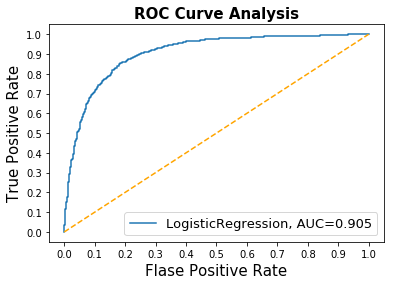

roc-auc score 0.834042610697639


In [61]:
yproba = lr.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test,  yproba)

auc = roc_auc_score(y_test, yproba)
    
plt.plot(fpr, tpr,label="{}, AUC={:.3f}".format(lr.__class__.__name__, auc))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

print("roc-auc score",roc_score_lr)

### Applying Decision Tree Classifier Model

In [116]:
dt = DecisionTreeClassifier(random_state = 4)

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)

roc_score_dt = roc_auc_score(y_test,y_pred_dt)

print("roc auc score for decision tree ", roc_score_dt)

roc auc score for decision tree  0.8732834218291986


### Applying Random Forest Classifier Model

In [117]:
rf = RandomForestClassifier(random_state = 4)

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

roc_score_rf = roc_auc_score(y_test,y_pred_rf)

print("roc auc score for Random Forest is",roc_score_rf)

roc auc score for Random Forest is 0.9072251284029547


### Applying Bagging Classifier Model

In [124]:
bagging_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 100, max_samples = 100, random_state = 4)

bagging_clf.fit(X_train,y_train)

y_pred_bagging = bagging_clf.predict(X_test)

roc_score_bagging = roc_auc_score(y_test,y_pred_bagging)

print("accuracy score",bagging_clf.score(X_test,y_test))
print("roc auc score for Bagging Classifier is",roc_score_bagging)


accuracy score 0.8371040723981901
roc auc score for Bagging Classifier is 0.8371282948431604


### Voting Classifer

In [129]:
# Various models
clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier(random_state=4)
clf_3 = RandomForestClassifier(random_state=4)

model_list = [('lr',clf_1),('DT',clf_2),('RF',clf_3)]

voting_clf_hard = VotingClassifier(estimators = model_list, voting ='soft')

voting_clf_hard.fit(X_train,y_train)

hard_voting_score = voting_clf_hard.score(X_test,y_test)

print("hard voting score",hard_voting_score)

hard voting score 0.9063348416289593


C:\Users\rakesh13575\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


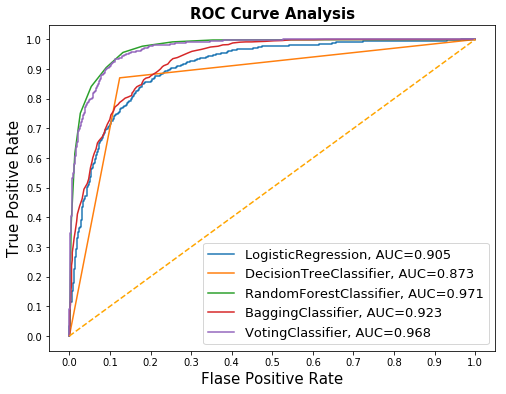

In [130]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

classifiers = [lr,dt,rf,bagging_clf,voting_clf_hard]

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()